# isb-degree

Compare ISB variants

Can do comparisons across:
- [Benchmark suites](#plots-suites)
- [Single becnhmarks](#plots-single-benchmarks)


In [3]:
from utils import plots, tables, utils
from matplotlib import cm
import numpy as np
%matplotlib widget

In [10]:
paths = {
    'baseline': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/bw_constrained/isb.csv', # degrees 1-4
    'isb_dist2': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/bw_constrained/isb_dist2.csv', # degrees 1-4, distance 2
    'isb_dist3': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/bw_constrained/isb_dist3.csv', # degrees 1-4, distance 3
    'isb_dist4': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/bw_constrained/isb_dist4.csv', # degrees 1-4, distance 4
    #'isb_deg2_ct0_3': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/bw_constrained/isb_deg2_ct0_3.csv', # degree 2, confidence thresholds [0, 3]
    #'isb_deg2_ct0_2': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/bw_constrained/isb_deg2_ct0_2.csv', # degree 2, confidence thresholds [0, 2]
    #'isb_deg2_ct0_1': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/bw_constrained/isb_deg2_ct0_1.csv', # degree 2, confidence thresholds [0, 1]
}
suites = [
    ('irregular', 'one_phase')
]
metrics  = [
    'ipc_improvement', 
    #'LLC_avg_degree', 
    'LLC_accuracy', 
    'LLC_coverage',
    #'LLC_mpki_reduction', 
    'LLC_issued_prefetches',
]
features = [
    {'Address'},
    {'PC_Address'},
    {'Delta_Path'},
    {'Delta_Path', 'PC_Delta'},
    {'Delta_Path', 'PC_Address'},
    {'Delta_Path', 'Address'},
]
baselines = [
    'isb_real',
    'isb_ideal',
    'sisb'
]

# Plots (suites)
Fix prefetch degree to 1 for everything (except Bingo), and compare to Bingo, SPP and Bingo+SPP hybrid.

In [11]:
dfs = {
    'baseline': tables.load_stats_csv(paths['baseline'], baselines, prefetchers_level='llc', separate_degrees=True),
    'isb_dist2': tables.load_stats_csv(paths['isb_dist2'], baselines, prefetchers_level='llc', separate_degrees=True),
    'isb_dist3': tables.load_stats_csv(paths['isb_dist3'], baselines, prefetchers_level='llc', separate_degrees=True),
    'isb_dist4': tables.load_stats_csv(paths['isb_dist4'], baselines, prefetchers_level='llc', separate_degrees=True),
    #'isb_deg2_ct0_3': tables.load_stats_csv(paths['isb_deg2_ct0_3'], baselines, prefetchers_level='llc'),
    #'isb_deg2_ct0_2': tables.load_stats_csv(paths['isb_deg2_ct0_2'], baselines, prefetchers_level='llc'),
    #'isb_deg2_ct0_1': tables.load_stats_csv(paths['isb_deg2_ct0_1'], baselines, prefetchers_level='llc'),
}

/u/cmolder/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Timely ISB

=== irregular one_phase ===


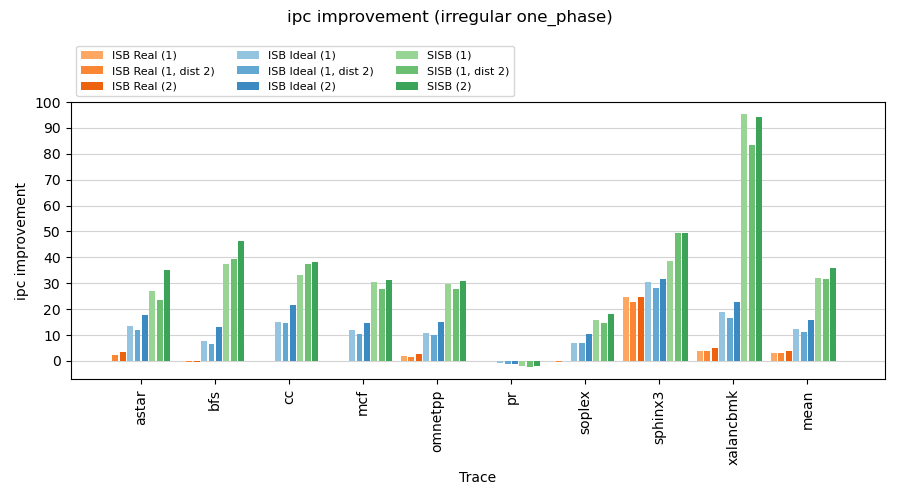

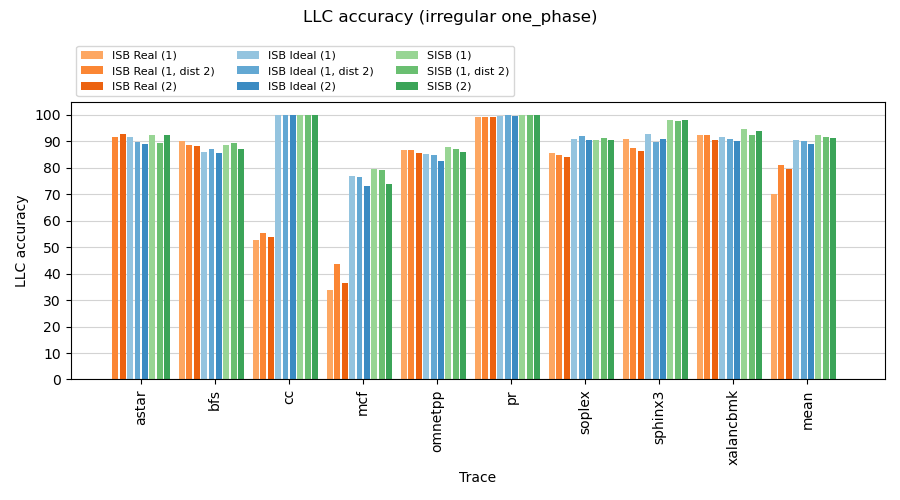

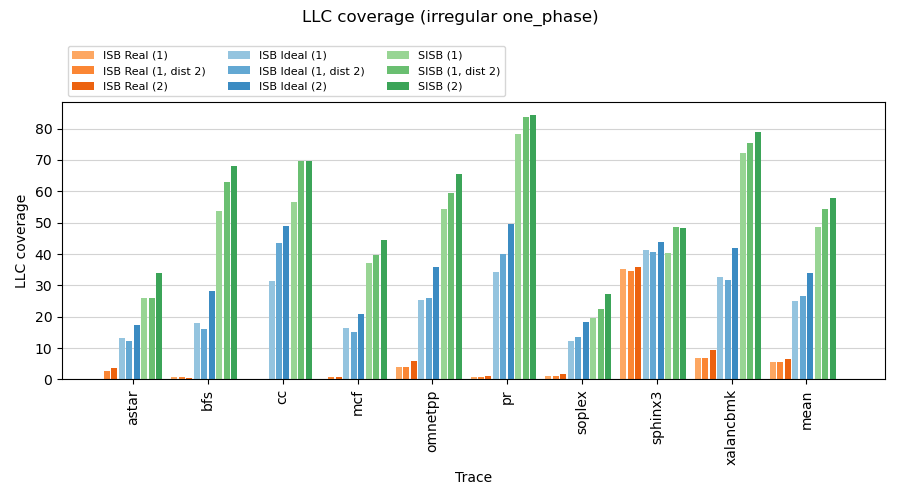

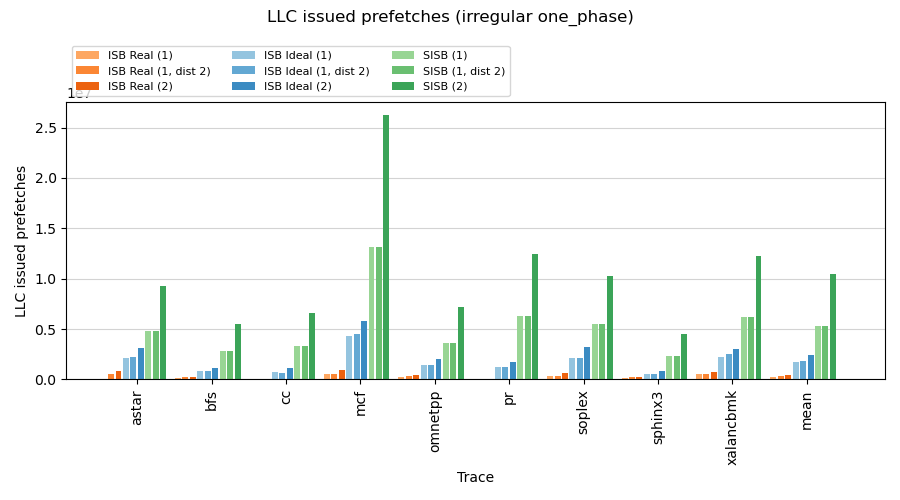

In [13]:
timely_isb_df = {
    'ISB Real (1)': dfs['baseline']['isb_real_1'],
    'ISB Real (1, dist 2)': dfs['isb_dist2']['isb_real_1'],
    'ISB Real (2)': dfs['baseline']['isb_real_2'],
    #'ISB Real (3)': dfs['baseline']['isb_real_3'],
    #'ISB Real (4)': dfs['baseline']['isb_real_4'],
    'ISB Ideal (1)': dfs['baseline']['isb_ideal_1'],
    'ISB Ideal (1, dist 2)': dfs['isb_dist2']['isb_ideal_1'],
    'ISB Ideal (2)': dfs['baseline']['isb_ideal_2'],
    #'ISB Ideal (3)': dfs['baseline']['isb_ideal_3'],
    #'ISB Ideal (4)': dfs['baseline']['isb_ideal_4'],
    'SISB (1)': dfs['baseline']['sisb_1'],
    'SISB (1, dist 2)': dfs['isb_dist2']['sisb_1'],
    'SISB (2)': dfs['baseline']['sisb_2'],
}

real_cmap = cm.get_cmap('Oranges')
ideal_cmap = cm.get_cmap('Blues')
sisb_cmap = cm.get_cmap('Greens')
cmap_idxs = np.linspace(0.4, 0.9, 5)

isb_colors = {
    'ISB Real (1)': real_cmap(cmap_idxs[0]),
    'ISB Real (1, dist 2)': real_cmap(cmap_idxs[1]),
    'ISB Real (2)': real_cmap(cmap_idxs[2]),
    #'ISB Real (3)': real_cmap(cmap_idxs[3]),
    #'ISB Real (4)': real_cmap(cmap_idxs[4]),
    'ISB Ideal (1)': ideal_cmap(cmap_idxs[0]),
    'ISB Ideal (1, dist 2)': ideal_cmap(cmap_idxs[1]),
    'ISB Ideal (2)': ideal_cmap(cmap_idxs[2]),
    #'ISB Ideal (3)': ideal_cmap(ideal_cmap_idxs[3]),
    #'ISB Ideal (4)': ideal_cmap(ideal_cmap_idxs[4]),
    'SISB (1)': sisb_cmap(cmap_idxs[0]),
    'SISB (1, dist 2)': sisb_cmap(cmap_idxs[1]),
    'SISB (2)': sisb_cmap(cmap_idxs[2]),
    #'ISB Ideal (3)': ideal_cmap(ideal_cmap_idxs[3]),
    #'ISB Ideal (4)': ideal_cmap(ideal_cmap_idxs[4]),
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 3,
    'loc': 'lower left',
    'bbox_to_anchor': (0, 1),
}
plots.plot_everything(
    timely_isb_df, suites=suites, metrics=metrics, colors=isb_colors, 
    legend_kwargs=legend_kwargs, figsize=(9, 5))

## Confidence ISB

In [14]:
from importlib import reload
reload(plots)

confidence_isb_df = {
    'ISB Real (1)': dfs['baseline']['isb_real_1'],
    'ISB Real (≤2) (0, 3)': dfs['isb_deg2_ct0_3']['isb_real'],
    'ISB Real (≤2) (0, 2)': dfs['isb_deg2_ct0_2']['isb_real'],
    'ISB Real (≤2) (0, 1)': dfs['isb_deg2_ct0_1']['isb_real'],
    'ISB Real (2)': dfs['baseline']['isb_real_2'],
    'ISB Ideal (1)': dfs['baseline']['isb_ideal_1'],
    'ISB Ideal (≤2) (0, 3)': dfs['isb_deg2_ct0_3']['isb_ideal'],
    'ISB Ideal (≤2) (0, 2)': dfs['isb_deg2_ct0_2']['isb_ideal'],
    'ISB Ideal (≤2) (0, 1)': dfs['isb_deg2_ct0_1']['isb_ideal'],
    'ISB Ideal (2)': dfs['baseline']['isb_ideal_2'],
}

real_cmap = cm.get_cmap('Oranges')
ideal_cmap = cm.get_cmap('Blues')
real_cmap_idxs = np.linspace(0.4, 0.9, 5)
ideal_cmap_idxs = np.linspace(0.4, 0.9, 5)

isb_colors = {
    'ISB Real (1)': real_cmap(real_cmap_idxs[0]),
    'ISB Real (≤2) (0, 3)': real_cmap(real_cmap_idxs[1]),
    'ISB Real (≤2) (0, 2)': real_cmap(real_cmap_idxs[2]),
    'ISB Real (≤2) (0, 1)': real_cmap(real_cmap_idxs[3]),
    'ISB Real (2)': real_cmap(real_cmap_idxs[4]),
    'ISB Ideal (1)': ideal_cmap(ideal_cmap_idxs[0]),
    'ISB Ideal (≤2) (0, 3)': ideal_cmap(ideal_cmap_idxs[1]),
    'ISB Ideal (≤2) (0, 2)': ideal_cmap(ideal_cmap_idxs[2]),
    'ISB Ideal (≤2) (0, 1)': ideal_cmap(ideal_cmap_idxs[3]),
    'ISB Ideal (2)': ideal_cmap(ideal_cmap_idxs[4]),
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 2,
    'loc': 'upper left',
    'bbox_to_anchor': (0, 1),
}
plots.plot_everything(
    confidence_isb_df, suites=suites, metrics=metrics, colors=isb_colors, 
    legend_kwargs=legend_kwargs, figsize=(9, 5))

KeyError: 'isb_deg2_ct0_3'

# Tables

## Timely ISB

In [15]:
tables.table_everything(timely_isb_df, suites=suites, metrics=metrics)

=== irregular one_phase ===
ISB Real (1)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,0.000000,0.000000,0.000000,0.000000
bfs,-0.104272,90.247355,0.866287,159488.000000
cc,0.001046,52.631579,0.006008,366.000000
mcf_46B,-0.026740,33.990565,0.309886,495349.000000
omnetpp_340B,1.720774,86.736925,3.886778,293822.000000
pr,-0.089280,99.349002,0.718226,52377.000000
soplex_66B,-0.157728,85.784531,1.073827,369837.000000
sphinx3_2520B,24.677487,91.018360,35.196308,169444.000000
xalancbmk_99B,3.673468,92.529336,6.879672,529021.000000


ISB Real (1, dist 2)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,2.234230,91.563016,2.578457,528396.000000
bfs,-0.265352,88.587592,0.638686,213654.000000
cc,0.003487,55.434783,0.007278,385.000000
mcf_46B,0.155094,43.711667,0.696048,496941.000000
omnetpp_340B,1.651720,86.928870,4.035658,296656.000000
pr,-0.053495,99.373789,0.754581,50836.000000
soplex_66B,-0.263380,85.041013,1.247067,389197.000000
sphinx3_2520B,22.806294,87.635046,34.528190,208400.000000
xalancbmk_99B,3.653850,92.533697,6.940534,545211.000000


ISB Real (2)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,3.547057,92.942982,3.750950,850387.0
bfs,-0.363476,88.409838,0.531089,273944.0
cc,0.003661,53.750000,0.011509,659.0
mcf_46B,-0.055938,36.353265,0.747791,893514.0
omnetpp_340B,2.571098,85.584616,5.731503,455003.0
pr,-0.090725,99.052417,0.998092,89985.0
soplex_66B,-0.209430,84.001380,1.620044,634066.0
sphinx3_2520B,24.648047,86.460165,35.703429,262901.0
xalancbmk_99B,5.081058,90.650750,9.518221,775337.0


ISB Ideal (1)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,13.681631,91.608699,13.184857,2.106714e+06
bfs,7.783508,86.162948,18.097730,8.096810e+05
cc,15.210327,99.905533,31.280989,7.664590e+05
mcf_46B,11.784406,76.983865,16.553298,4.279594e+06
omnetpp_340B,10.679515,85.246207,25.454354,1.398682e+06
pr,-0.901832,99.781306,34.340733,1.214960e+06
soplex_66B,7.050185,90.888013,12.155226,2.158283e+06
sphinx3_2520B,30.432376,92.933317,41.410341,5.834720e+05
xalancbmk_99B,18.773965,91.826915,32.803020,2.275179e+06


ISB Ideal (1, dist 2)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,11.928020,89.811491,12.117933,2.194402e+06
bfs,6.553148,87.247122,16.163810,8.558860e+05
cc,14.734023,99.832109,43.427750,6.334020e+05
mcf_46B,10.352857,76.522882,15.184712,4.522744e+06
omnetpp_340B,10.146902,84.903759,25.982832,1.450976e+06
pr,-1.125935,99.799273,40.122332,1.252154e+06
soplex_66B,6.790926,91.984838,13.411879,2.158107e+06
sphinx3_2520B,28.119587,89.926096,40.703189,5.746490e+05
xalancbmk_99B,16.694013,91.004749,31.636313,2.484722e+06


ISB Ideal (2)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,17.724029,89.076447,17.227126,3.087378e+06
bfs,12.987023,85.609414,28.119069,1.143483e+06
cc,21.503912,99.795529,48.916409,1.125638e+06
mcf_46B,14.502817,73.075878,20.772249,5.844548e+06
omnetpp_340B,15.221902,82.415772,35.774231,2.068869e+06
pr,-1.371363,99.681556,49.516569,1.747498e+06
soplex_66B,10.546429,90.396619,18.380468,3.191881e+06
sphinx3_2520B,31.806625,90.907357,43.805816,8.440990e+05
xalancbmk_99B,22.954379,89.992094,41.831052,3.017636e+06


SISB (1)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,26.974436,92.560747,25.976842,4.765156e+06
bfs,37.393545,88.817191,53.633824,2.860163e+06
cc,33.041368,99.941351,56.678709,3.298275e+06
mcf_46B,30.477366,79.470758,37.291426,1.312722e+07
omnetpp_340B,29.752644,87.842338,54.277637,3.651414e+06
pr,-1.887522,99.816527,78.362912,6.295622e+06
soplex_66B,15.747335,90.651520,19.711027,5.520789e+06
sphinx3_2520B,38.721442,98.243126,40.207994,2.314193e+06
xalancbmk_99B,95.241747,94.743047,72.109030,6.184860e+06


SISB (1, dist 2)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,23.604039,89.246213,26.046043,4.764542e+06
bfs,39.362908,89.408204,63.070486,2.857952e+06
cc,37.569214,99.984217,69.617060,3.297481e+06
mcf_46B,27.887887,79.122709,39.799764,1.312695e+07
omnetpp_340B,27.906458,87.017217,59.464780,3.648440e+06
pr,-2.290184,99.947484,83.602332,6.295620e+06
soplex_66B,14.720791,91.156298,22.521508,5.513535e+06
sphinx3_2520B,49.466963,97.816667,48.646621,2.313960e+06
xalancbmk_99B,83.482103,92.606286,75.278917,6.184207e+06


SISB (2)


,ipc_improvement,LLC_accuracy,LLC_coverage,LLC_issued_prefetches
run_name,,,,
astar_313B,35.298244,92.518975,34.001958,9.320734e+06
bfs,46.296747,87.003924,68.163966,5.546284e+06
cc,38.049178,99.962945,69.622814,6.572303e+06
mcf_46B,31.310654,73.887182,44.505552,2.624483e+07
omnetpp_340B,30.956908,86.018118,65.644283,7.239879e+06
pr,-1.811616,99.892833,84.328588,1.248761e+07
soplex_66B,18.018470,90.711770,27.192861,1.029880e+07
sphinx3_2520B,49.499936,97.906783,48.288627,4.510428e+06
xalancbmk_99B,94.092312,93.795312,78.826866,1.222393e+07


## Confidence ISB

In [16]:
tables.table_everything(confidence_isb_df, suites=suites, metrics=metrics)

NameError: name 'confidence_isb_df' is not defined